<a href="https://colab.research.google.com/github/Devsigner26/RagaClassificationUsingML/blob/main/raga_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydub librosa numpy pandas scikit-learn matplotlib seaborn

In [ ]:
import os
from pydub import AudioSegment
import math
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def split_audio(file_path, segment_length_ms, output_folder):
    try:
        audio = AudioSegment.from_mp3(file_path)
        total_length_ms = len(audio)
        num_segments = math.floor(total_length_ms / segment_length_ms)
        segments = []

        for i in range(num_segments):
            start_ms = i * segment_length_ms
            end_ms = start_ms + segment_length_ms
            segment = audio[start_ms:end_ms]
            segment_file_name = f"{os.path.splitext(os.path.basename(file_path))[0]}_segment_{i}.wav"
            segment_path = os.path.join(output_folder, segment_file_name)
            segment.export(segment_path, format="wav")
            segments.append(segment_path)

        return segments
    except CouldntDecodeError as e:
        print(f"Could not decode {file_path}: {e}")
        return []  # Return an empty list to skip this file

In [ ]:
output_base_path = 'segmented_dataset'
os.makedirs(output_base_path, exist_ok=True)

In [ ]:
segment_length_ms = 60 * 1000  # 60 seconds

mp3_dir = '/content'

raga_files = []

for filename in os.listdir(mp3_dir):
    if filename.endswith('.mp3'):
        file_path = os.path.join(mp3_dir, filename)
        raga_label = os.path.splitext(filename)[0].lower()  # Remove .mp3 and lowercase
        raga_files.append({
            'file_path': file_path,
            'raga_label': raga_label
        })

# Keep track of the minimum number of segments across all ragas
min_num_segments = float('inf')
raga_segment_paths = {}

for raga in raga_files:
    file_path = raga['file_path']
    raga_label = raga['raga_label']
    output_folder = os.path.join(output_base_path, raga_label)
    os.makedirs(output_folder, exist_ok=True)

    segments = split_audio(file_path, segment_length_ms, output_folder)
    raga_segment_paths[raga_label] = segments
    num_segments = len(segments)
    print(f"{raga_label}: {num_segments} segments")

    if num_segments < min_num_segments:
        min_num_segments = num_segments


raag bhimpalasi in flute: 10 segments
raga khamaj in flute: 13 segments
kedar on shehnai: 31 segments
bhupali on sitar: 22 segments
bhupali in flute: 25 segments
raag bilawal in flute: 30 segments
bihag on sitar: 31 segments
raga bhairav in sitar: 15 segments
hameer on sitar: 8 segments
bihag on shehnai: 21 segments
raga malhar in sehnai: 29 segments
hameer in flute: 10 segments
hameer in shehnai: 14 segments
raga khamaj in sarod: 15 segments
raag yaman  in sarod: 8 segments
raag yaman  in sitar: 9 segments
bhupali in shehnai: 16 segments
hameer in sarangi: 14 segments
raag yaman in sarangi: 27 segments
bihag on sarod: 19 segments
raga bhimpalasi in sehnai: 11 segments
raga khamaj on shehnai: 14 segments
rag yaman in sehnai: 22 segments
kedar on sitar: 12 segments
bihag on sarengi: 9 segments
kedar on sarod: 21 segments
raga khamaj in sarangi: 23 segments
bihag on flute: 23 segments
raga khamaj in sitar: 14 segments
raga malhar in sitar: 16 segments
kedar in sarangi: 14 segments
kedar 

In [ ]:
for raga_label, segments in raga_segment_paths.items():
    raga_segment_paths[raga_label] = segments[:min_num_segments]
    print(f"{raga_label} trimmed to {len(raga_segment_paths[raga_label])} segments")

raag bhimpalasi in flute trimmed to 8 segments
raga khamaj in flute trimmed to 8 segments
kedar on shehnai trimmed to 8 segments
bhupali on sitar trimmed to 8 segments
bhupali in flute trimmed to 8 segments
raag bilawal in flute trimmed to 8 segments
bihag on sitar trimmed to 8 segments
raga bhairav in sitar trimmed to 8 segments
hameer on sitar trimmed to 8 segments
bihag on shehnai trimmed to 8 segments
raga malhar in sehnai trimmed to 8 segments
hameer in flute trimmed to 8 segments
hameer in shehnai trimmed to 8 segments
raga khamaj in sarod trimmed to 8 segments
raag yaman  in sarod trimmed to 8 segments
raag yaman  in sitar trimmed to 8 segments
bhupali in shehnai trimmed to 8 segments
hameer in sarangi trimmed to 8 segments
raag yaman in sarangi trimmed to 8 segments
bihag on sarod trimmed to 8 segments
raga bhimpalasi in sehnai trimmed to 8 segments
raga khamaj on shehnai trimmed to 8 segments
rag yaman in sehnai trimmed to 8 segments
kedar on sitar trimmed to 8 segments
bihag 

In [ ]:
segment_length_ms = 30 * 1000  # 30 seconds

mp3_dir = '/content'

raga_files = []

for filename in os.listdir(mp3_dir):
    if filename.endswith('.mp3'):
        file_path = os.path.join(mp3_dir, filename)
        raga_label = os.path.splitext(filename)[0].lower()  # Remove .mp3 and lowercase
        raga_files.append({
            'file_path': file_path,
            'raga_label': raga_label
        })

# Keep track of the minimum number of segments across all ragas
min_num_segments = float('inf')
raga_segment_paths = {}

for raga in raga_files:
    file_path = raga['file_path']
    raga_label = raga['raga_label']
    output_folder = os.path.join(output_base_path, raga_label)
    os.makedirs(output_folder, exist_ok=True)

    segments = split_audio(file_path, segment_length_ms, output_folder)
    raga_segment_paths[raga_label] = segments
    num_segments = len(segments)
    print(f"{raga_label}: {num_segments} segments")

    if num_segments < min_num_segments:
        min_num_segments = num_segments

In [ ]:
for raga_label, segments in raga_segment_paths.items():
    raga_segment_paths[raga_label] = segments[:min_num_segments]
    print(f"{raga_label} trimmed to {len(raga_segment_paths[raga_label])} segments")

In [ ]:
segment_length_ms = 10 * 1000  # 10 seconds

mp3_dir = '/content'

raga_files = []

for filename in os.listdir(mp3_dir):
    if filename.endswith('.mp3'):
        file_path = os.path.join(mp3_dir, filename)
        raga_label = os.path.splitext(filename)[0].lower()  # Remove .mp3 and lowercase
        raga_files.append({
            'file_path': file_path,
            'raga_label': raga_label
        })

# Keep track of the minimum number of segments across all ragas
min_num_segments = float('inf')
raga_segment_paths = {}

for raga in raga_files:
    file_path = raga['file_path']
    raga_label = raga['raga_label']
    output_folder = os.path.join(output_base_path, raga_label)
    os.makedirs(output_folder, exist_ok=True)

    segments = split_audio(file_path, segment_length_ms, output_folder)
    raga_segment_paths[raga_label] = segments
    num_segments = len(segments)
    print(f"{raga_label}: {num_segments} segments")

    if num_segments < min_num_segments:
        min_num_segments = num_segments

In [ ]:
for raga_label, segments in raga_segment_paths.items():
    raga_segment_paths[raga_label] = segments[:min_num_segments]
    print(f"{raga_label} trimmed to {len(raga_segment_paths[raga_label])} segments")

In [ ]:
metadata = []

for raga_label, segments in raga_segment_paths.items():
    for segment_path in segments:
        metadata.append({'file_path': segment_path, 'raga_label': raga_label})

metadata_df = pd.DataFrame(metadata)
print(metadata_df.head())

                                           file_path                raga_label
0  segmented_dataset/raag bhimpalasi in flute/Raa...  raag bhimpalasi in flute
1  segmented_dataset/raag bhimpalasi in flute/Raa...  raag bhimpalasi in flute
2  segmented_dataset/raag bhimpalasi in flute/Raa...  raag bhimpalasi in flute
3  segmented_dataset/raag bhimpalasi in flute/Raa...  raag bhimpalasi in flute
4  segmented_dataset/raag bhimpalasi in flute/Raa...  raag bhimpalasi in flute


In [ ]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, sr=None)

        # Extract features
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate).T, axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate).T, axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sample_rate).T, axis=0)

        # Combine features
        features = np.hstack([mfccs, chroma, mel, contrast, tonnetz])
        return features
    except Exception as e:
        print(f"Error encountered while parsing file: {file_name}, error: {e}")
        return None

In [ ]:
features_list = []
labels_list = []

for index, row in metadata_df.iterrows():
    file_name = row['file_path']
    raga_label = row['raga_label']
    features = extract_features(file_name)

    if features is not None:
        features_list.append(features)
        labels_list.append(raga_label)

In [ ]:
features_df = pd.DataFrame(features_list)
features_df['label'] = labels_list

print(features_df.head())

            0           1          2         3          4          5  \
0 -371.892120   93.343491 -11.173595 -3.338137 -19.565111  -5.497758   
1 -334.661743  100.430473 -20.029797 -8.415511 -33.254917 -13.404191   
2 -393.422516  112.796562  -0.199084 -3.073222  -4.911247  -2.853558   
3 -389.014404  122.391449   1.509806 -5.282400  -3.362696  -2.144864   
4 -379.491333  129.444168  -2.182213  1.005393  -5.946195  -4.198565   

           6          7          8          9  ...        184        185  \
0 -21.843719 -24.949921 -21.091364 -14.473744  ...  21.851777  18.935248   
1 -31.437561 -28.293432 -22.866562 -15.067483  ...  21.786354  19.165658   
2 -12.163302 -20.703609 -20.832668 -20.969219  ...  20.860381  18.838697   
3 -10.695333 -17.506979 -16.763020 -17.310507  ...  20.491906  18.616037   
4 -12.717846 -19.575964 -18.253038 -21.530552  ...  19.144275  17.401943   

         186       187       188       189       190       191       192  \
0  35.403626  0.228476 -0.093924  

In [ ]:
label_encoder = LabelEncoder()
features_df['label_encoded'] = label_encoder.fit_transform(features_df['label'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"Label mapping: {label_mapping}")

Label mapping: {'bhupali in flute': np.int64(0), 'bhupali in shehnai': np.int64(1), 'bhupali on sitar': np.int64(2), 'bihag on flute': np.int64(3), 'bihag on sarengi': np.int64(4), 'bihag on sarod': np.int64(5), 'bihag on shehnai': np.int64(6), 'bihag on sitar': np.int64(7), 'hameer in flute': np.int64(8), 'hameer in sarangi': np.int64(9), 'hameer in shehnai': np.int64(10), 'hameer on sitar': np.int64(11), 'kedar in flute': np.int64(12), 'kedar in sarangi': np.int64(13), 'kedar on sarod': np.int64(14), 'kedar on shehnai': np.int64(15), 'kedar on sitar': np.int64(16), 'raag bhimpalasi in flute': np.int64(17), 'raag bilawal in flute': np.int64(18), 'raag yaman  in sarod': np.int64(19), 'raag yaman  in sitar': np.int64(20), 'raag yaman in sarangi': np.int64(21), 'rag yaman in sehnai': np.int64(22), 'raga bhairav in sitar': np.int64(23), 'raga bhimpalasi in sehnai': np.int64(24), 'raga khamaj in flute': np.int64(25), 'raga khamaj in sarangi': np.int64(26), 'raga khamaj in sarod': np.int64(

In [ ]:
X = features_df.drop(['label', 'label_encoded'], axis=1)
y = features_df['label_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(report)

                           precision    recall  f1-score   support

         bhupali in flute       1.00      1.00      1.00         2
       bhupali in shehnai       1.00      0.50      0.67         2
         bhupali on sitar       1.00      1.00      1.00         2
           bihag on flute       1.00      1.00      1.00         3
         bihag on sarengi       1.00      1.00      1.00         2
           bihag on sarod       1.00      1.00      1.00         2
         bihag on shehnai       1.00      1.00      1.00         3
           bihag on sitar       1.00      1.00      1.00         3
          hameer in flute       1.00      1.00      1.00         2
        hameer in sarangi       1.00      1.00      1.00         2
        hameer in shehnai       0.75      1.00      0.86         3
          hameer on sitar       1.00      1.00      1.00         2
           kedar in flute       1.00      1.00      1.00         2
         kedar in sarangi       1.00      1.00      1.00     

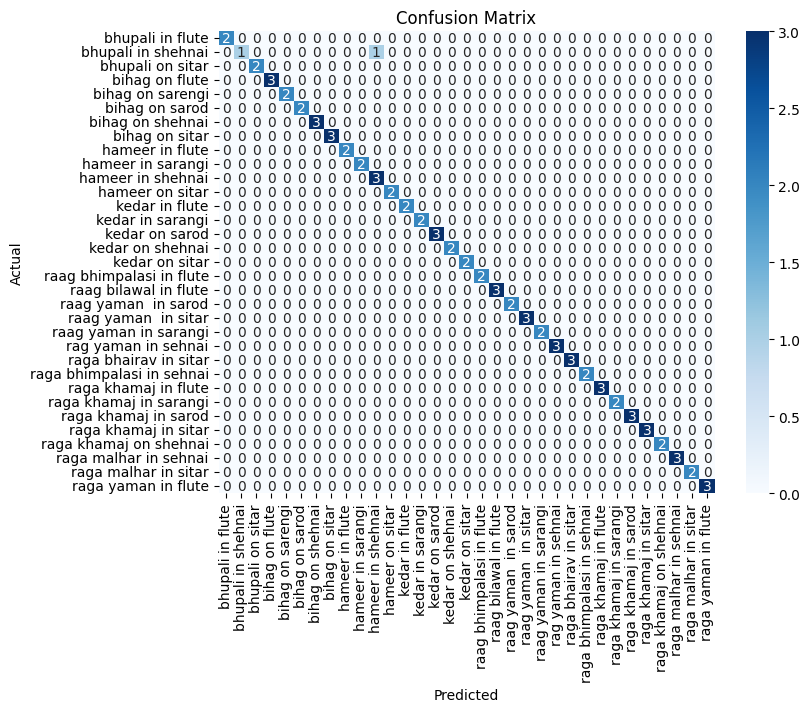

Model Accuracy: 98.75%


In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

=== MLP (scikit-learn) Evaluation ===
Confusion Matrix:


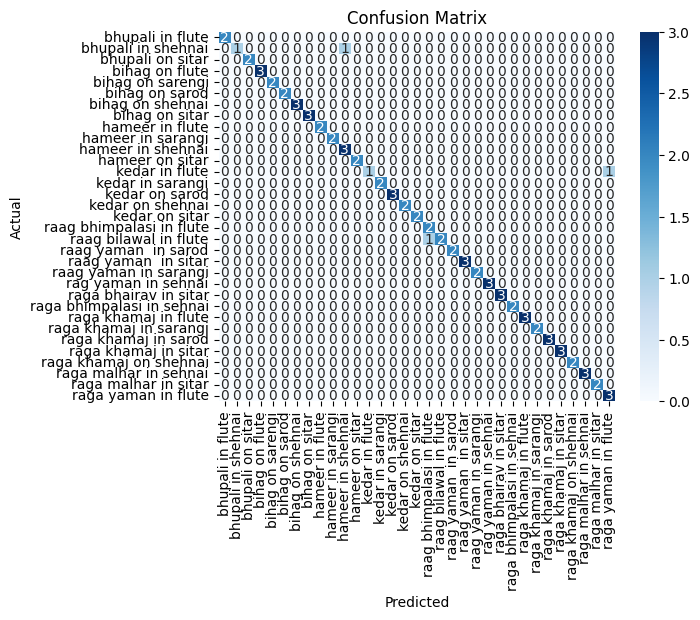


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp_model = MLPClassifier(hidden_layer_sizes=(100, ),
                          activation='relu',
                          solver='adam',
                          max_iter=300,
                          random_state=42)

mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

print("=== MLP (scikit-learn) Evaluation ===")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

accuracy = accuracy_score(y_test, y_pred_mlp)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")

=== Gaussian Naive Bayes Evaluation ===
Confusion Matrix:


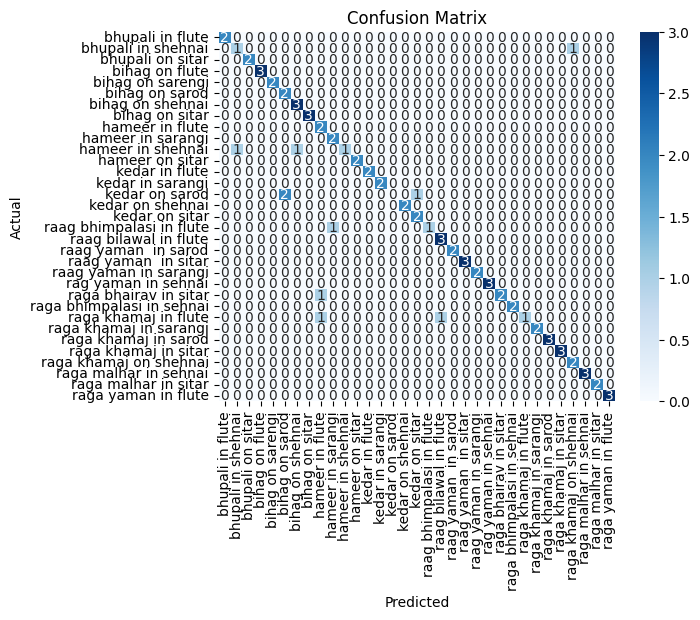


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         3
           8       0.50      1.00      0.67         2
           9       0.67      1.00      0.80         2
          10       1.00      0.33      0.50         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         3
          15       1.00      1.00      1.00         2
          16       0.67      1.00      0.80         2
   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and train
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Predict
y_pred_gnb = gnb_model.predict(X_test)

# Evaluation
print("=== Gaussian Naive Bayes Evaluation ===")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

accuracy = accuracy_score(y_test, y_pred_gnb)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


=== SVM (RBF Kernel) Evaluation ===


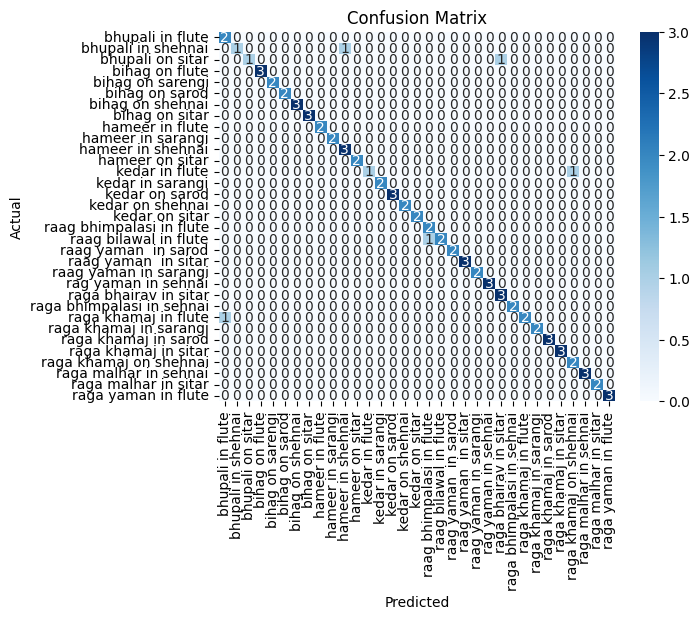


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

In [ ]:
from sklearn.svm import SVC

# Instantiate and train
svm_rbf_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf_model.fit(X_train, y_train)

# Predict
y_pred_svm_rbf = svm_rbf_model.predict(X_test)

# Evaluation
print("=== SVM (RBF Kernel) Evaluation ===")
cm = confusion_matrix(y_test, y_pred_svm_rbf)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_rbf))

accuracy = accuracy_score(y_test, y_pred_svm_rbf)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


=== SVM (Linear Kernel) Evaluation ===


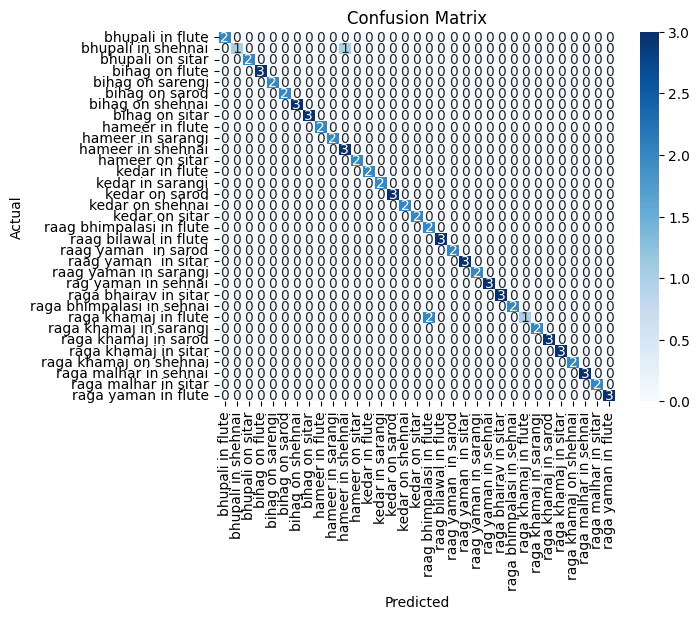


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
   

In [ ]:
from sklearn.svm import SVC

# Instantiate and train
svm_linear_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear_model.fit(X_train, y_train)

# Predict
y_pred_svm_linear = svm_linear_model.predict(X_test)

# Evaluation
print("=== SVM (Linear Kernel) Evaluation ===")
cm = confusion_matrix(y_test, y_pred_svm_linear)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm_linear))

accuracy = accuracy_score(y_test, y_pred_svm_linear)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'raga_classifier_model.pkl')

# Save the scaler and label encoder
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
loaded_model = joblib.load('raga_classifier_model.pkl')
loaded_scaler = joblib.load('feature_scaler.pkl')
loaded_label_encoder = joblib.load('label_encoder.pkl')

In [ ]:
def predict_raga(file_name):
    features = extract_features(file_name)
    if features is not None:
        features_scaled = loaded_scaler.transform([features])
        prediction = loaded_model.predict(features_scaled)
        raga = loaded_label_encoder.inverse_transform(prediction)
        return raga[0]
    else:
        return None

new_file = 'Albela Sajan Aayo Re.mp3'


from pydub import AudioSegment

audio = AudioSegment.from_mp3(new_file)
audio.export('temp.wav', format='wav')

predicted_raga = predict_raga('temp.wav')
print(f"The predicted raga is: {predicted_raga}")

The predicted raga is: bihag on sarod


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np


features_df = pd.DataFrame(features_list)
features_df['label'] = labels_list


label_encoder = LabelEncoder()
features_df['label_encoded'] = label_encoder.fit_transform(features_df['label'])

num_classes = len(label_encoder.classes_)
print(f"Number of unique classes: {num_classes}")

X = features_df.drop(['label', 'label_encoded'], axis=1)
y = features_df['label_encoded']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape(X_scaled.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=48)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss * 100:.4f}%")
print(f"Test Accuracy: {accuracy * 100:.4f}%")

Number of unique classes: 27
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1022 - loss: 3.4401
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2233 - loss: 2.9024 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4553 - loss: 2.4975
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6951 - loss: 2.1424
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8076 - loss: 1.8593
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8318 - loss: 1.5919
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8544 - loss: 1.3420
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8712 - loss: 1.1034 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8840 - loss: 0.9570
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9236 - loss: 0.7833
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.6124
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9836 - loss: 0.4890
Epoch 13/50